<a href="https://colab.research.google.com/github/Naden-Mohamed/Exercises-and-Assignments-DEPI/blob/main/Pandas_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Section 1: Data Loading and Inspection

In [2]:
df = pd.read_csv("medical_conditions_dataset.csv")

In [3]:
df.head(5)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1,User0001,NaN,male,Non-Smoker,NaN,NaN,NaN,Pneumonia
1,2,User0002,30.0,male,Non-Smoker,NaN,105.315064,NaN,Diabetic
2,3,User0003,18.0,male,Non-Smoker,35.612486,NaN,NaN,Pneumonia
3,4,User0004,NaN,male,Non-Smoker,NaN,99.119829,NaN,Pneumonia
4,5,User0005,76.0,male,Non-Smoker,NaN,NaN,NaN,Diabetic


In [4]:
df.tail(5)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
9995,9996,User9996,NaN,male,Non-Smoker,25.029002,152.540355,137.551451,Pneumonia
9996,9997,User9997,NaN,male,Non-Smoker,27.017487,NaN,NaN,Diabetic
9997,9998,User9998,23.0,male,Smoker,NaN,148.833321,173.931480,Pneumonia
9998,9999,User9999,NaN,female,Non-Smoker,NaN,NaN,NaN,Pneumonia
9999,10000,User10000,27.0,male,Non-Smoker,25.454891,NaN,196.083267,Diabetic


In [6]:
df.shape

(10000, 9)

In [7]:
df.columns

Index(['id', 'full_name', 'age', 'gender', 'smoking_status', 'bmi',
       'blood_pressure', 'glucose_levels', 'condition'],
      dtype='object')

In [12]:
df.dtypes

,0
id,int64
full_name,object
age,float64
gender,object
smoking_status,object
bmi,float64
blood_pressure,float64
glucose_levels,float64
condition,object


In [13]:
df.isnull().sum()

,0
id,0
full_name,0
age,4555
gender,0
smoking_status,0
bmi,5348
blood_pressure,6234
glucose_levels,5244
condition,0


# Section 2: Data Cleaning

In [79]:
# Used KNNImputer cuz there were so much missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data = df.select_dtypes(include=[np.number])
df_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index = data.index)
df[df_imputed.columns] = df_imputed

In [16]:
df.head(10)

,id,full_name,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
0,1.0,User0001,42.6,male,Non-Smoker,32.848567,120.739198,166.766104,Pneumonia
1,2.0,User0002,30.0,male,Non-Smoker,32.848567,105.315064,166.766104,Diabetic
2,3.0,User0003,18.0,male,Non-Smoker,35.612486,119.828959,163.740044,Pneumonia
3,4.0,User0004,42.6,male,Non-Smoker,32.848567,99.119829,166.766104,Pneumonia
4,5.0,User0005,76.0,male,Non-Smoker,27.125487,133.435970,136.817402,Diabetic
5,6.0,User0006,40.0,male,Non-Smoker,33.840723,111.387618,169.825527,Diabetic
6,7.0,User0007,49.0,male,Smoker,33.440385,120.755877,153.151126,Cancer
7,8.0,User0008,47.0,male,Non-Smoker,30.443313,115.826322,199.339699,Diabetic
8,9.0,User0009,56.2,male,Non-Smoker,39.649679,120.739198,166.766104,Diabetic
9,10.0,User0010,65.0,male,Smoker,27.125487,133.435970,136.817402,Diabetic


In [18]:
df = df.drop_duplicates()

In [20]:
df["age"]=df["age"].astype(np.int8)
df["gender"]=df["gender"].astype("category")
df["smoking_status"]=df["smoking_status"].astype("category")
df["bmi"]=df["bmi"].astype(np.float16)
df["blood_pressure"]=df["blood_pressure"].astype(np.float16)
df["glucose_levels"]=df["glucose_levels"].astype(np.float16)
df["condition"]=df["condition"].astype("category")

In [21]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             10000 non-null  int8    
 1   gender          10000 non-null  category
 2   smoking_status  10000 non-null  category
 3   bmi             10000 non-null  float16 
 4   blood_pressure  10000 non-null  float16 
 5   glucose_levels  10000 non-null  float16 
 6   condition       10000 non-null  category
dtypes: category(3), float16(3), int8(1)
memory usage: 98.5 KB


In [19]:
df.drop(columns=['id','full_name'], inplace=True)

# Section 3: Data Transformation

In [24]:
diabetic = df[df['condition'] == 'Diabetic']
diabetic

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
1,30,male,Non-Smoker,32.843750,105.3125,166.750,Diabetic
4,76,male,Non-Smoker,27.125000,133.3750,136.875,Diabetic
5,40,male,Non-Smoker,33.843750,111.3750,169.875,Diabetic
7,47,male,Non-Smoker,30.437500,115.8125,199.375,Diabetic
8,56,male,Non-Smoker,39.656250,120.7500,166.750,Diabetic
...,...,...,...,...,...,...,...
9988,43,male,Non-Smoker,16.906250,133.0000,144.125,Diabetic
9990,83,male,Non-Smoker,26.125000,142.8750,185.375,Diabetic
9994,34,male,Non-Smoker,27.234375,149.6250,181.125,Diabetic
9996,50,male,Non-Smoker,27.015625,132.1250,174.750,Diabetic


In [26]:
df['condition'].value_counts(normalize = True)* 100

,proportion
condition,
Diabetic,60.13
Pneumonia,25.27
Cancer,14.60


In [34]:
condition_age = df.groupby('condition')['age'].describe()
condition_age

<ipython-input-34-ca254e65e3ff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  condition_age = df.groupby('condition')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Cancer,1460.0,52.283562,16.880758,18.0,41.0,52.0,63.0,89.0
Diabetic,6013.0,53.454183,16.723002,18.0,42.0,53.0,64.0,89.0
Pneumonia,2527.0,53.204590,16.375701,18.0,42.0,53.0,64.0,89.0


In [41]:
numeric_cols = df.select_dtypes(include='number').columns

stat = df.groupby('condition', observed=True)[numeric_cols].agg(['mean', 'median', 'count'])
stat


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


age                     bmi                  blood_pressure  \
                mean median count       mean     median count           mean   
condition                                                                      
Cancer     52.283562   52.0  1460  27.566919  27.359375  1460     135.618744   
Diabetic   53.454183   53.0  6013  27.348026  27.312500  6013     135.164978   
Pneumonia  53.204590   53.0  2527  27.454111  27.437500  2527     135.276855   

                          glucose_levels                  
             median count           mean    median count  
condition                                                 
Cancer     135.1875  1460     134.240753  134.3125  1460  
Diabetic   135.1250  6013     135.515884  135.6250  6013  
Pneumonia  134.7500  2527     135.420975  135.5000  2527

In [29]:
df.sort_values(by = 'age')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,gender,smoking_status,bmi,blood_pressure,glucose_levels,condition
5178,18,male,Non-Smoker,28.515625,123.0625,166.0000,Diabetic
6943,18,male,Non-Smoker,28.781250,129.3750,189.8750,Cancer
6907,18,male,Non-Smoker,34.093750,148.6250,178.6250,Pneumonia
3354,18,male,Non-Smoker,24.796875,138.7500,122.6875,Pneumonia
2280,18,male,Non-Smoker,20.546875,132.7500,92.5000,Cancer
...,...,...,...,...,...,...,...
2824,89,male,Non-Smoker,21.625000,146.0000,117.0625,Diabetic
6014,89,male,Non-Smoker,24.687500,125.1875,100.9375,Diabetic
4253,89,male,Non-Smoker,24.484375,109.8750,176.2500,Diabetic
4876,89,male,Non-Smoker,22.859375,167.5000,130.3750,Cancer


# Section 4: Data Aggregation

In [46]:
numeric_cols = df.select_dtypes(include='number').columns

stat = df[numeric_cols].agg(['mean', 'median', 'count'])
stat

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,age,bmi,blood_pressure,glucose_levels
mean,53.2202,inf,inf,inf
median,53.0000,27.34375,135.0,135.5
count,10000.0000,10000.00000,10000.0,10000.0


In [51]:
pd.pivot_table(df, values =numeric_cols, index = 'condition', aggfunc = 'mean',observed= True)

,age,blood_pressure,bmi,glucose_levels
condition,,,,
Cancer,52.283562,135.618744,27.566919,134.240753
Diabetic,53.454183,135.164978,27.348026,135.515884
Pneumonia,53.204590,135.276855,27.454111,135.420975


In [53]:
pd.crosstab(df['condition'], df['smoking_status'], normalize = 'index')

smoking_status,Non-Smoker,Smoker
condition,,
Cancer,0.906164,0.093836
Diabetic,0.899717,0.100283
Pneumonia,0.902651,0.097349


In [57]:
correlation_matrix = df.corr(method= 'pearson', numeric_only= True)
correlation_matrix

,age,bmi,blood_pressure,glucose_levels
age,1.000000,0.034730,0.012382,-0.010558
bmi,0.034730,1.000000,0.003648,0.008245
blood_pressure,0.012382,0.003648,1.000000,0.003459
glucose_levels,-0.010558,0.008245,0.003459,1.000000


# Section 5: Data Visualization

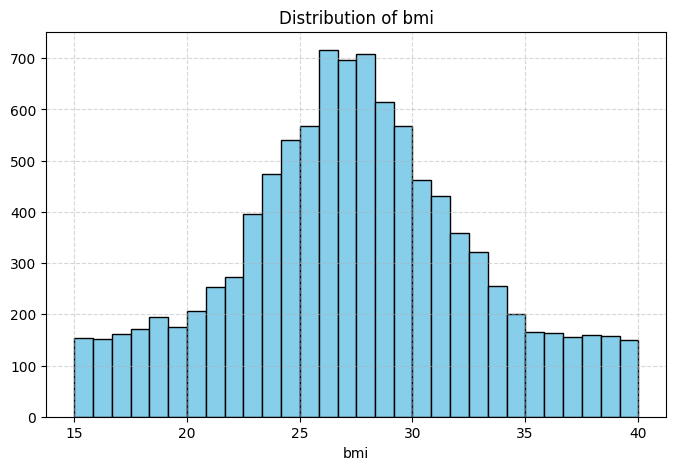

In [75]:
plt.figure(figsize=(8, 5))
df['bmi'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of bmi')
plt.xlabel('bmi')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<ipython-input-73-a1f1afbf5749>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='condition', palette='Set2')


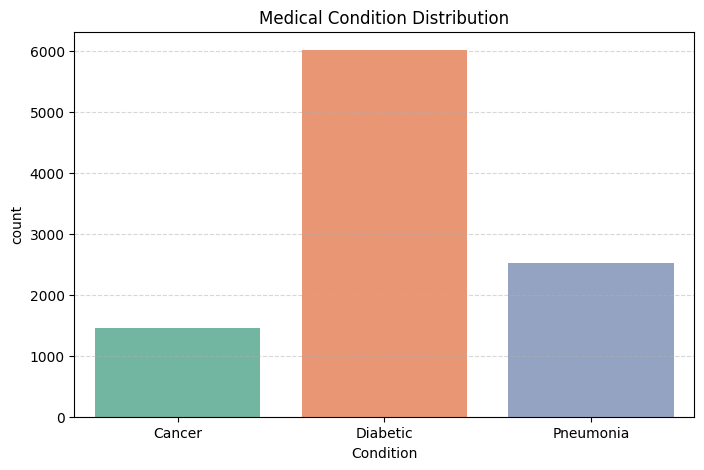

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='condition', palette='Set2')
plt.title('Medical Condition Distribution')
plt.xlabel('Condition')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


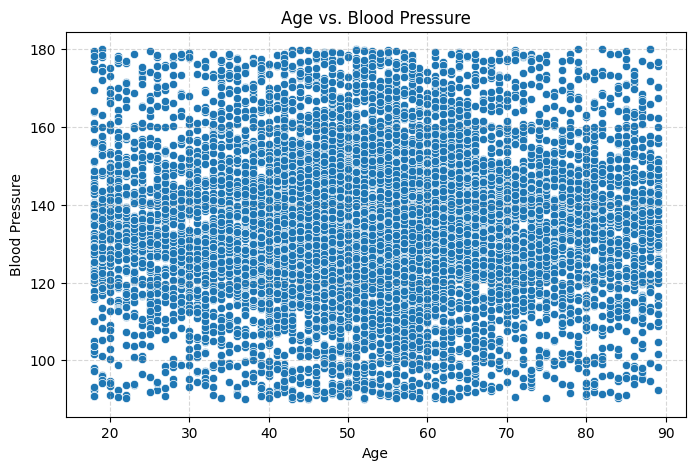

In [74]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='blood_pressure')
plt.title('Age vs. Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


<ipython-input-78-8f10456b7457>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='condition', y='glucose_levels', palette='Pastel1')


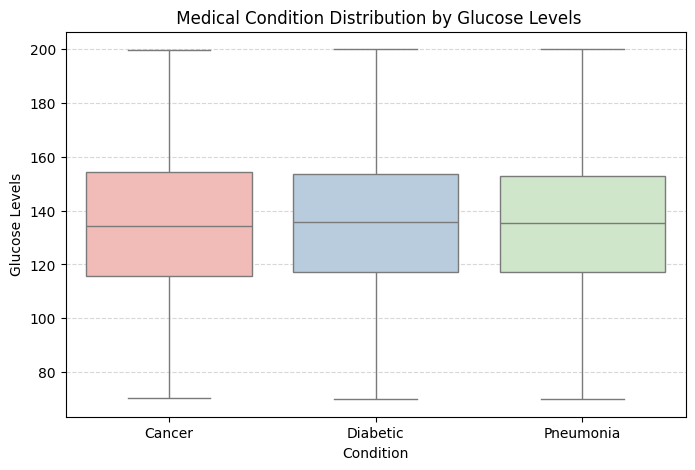

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='condition', y='glucose_levels', palette='Pastel1')
plt.title(' Medical Condition Distribution by Glucose Levels')
plt.xlabel('Condition')
plt.ylabel('Glucose Levels')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


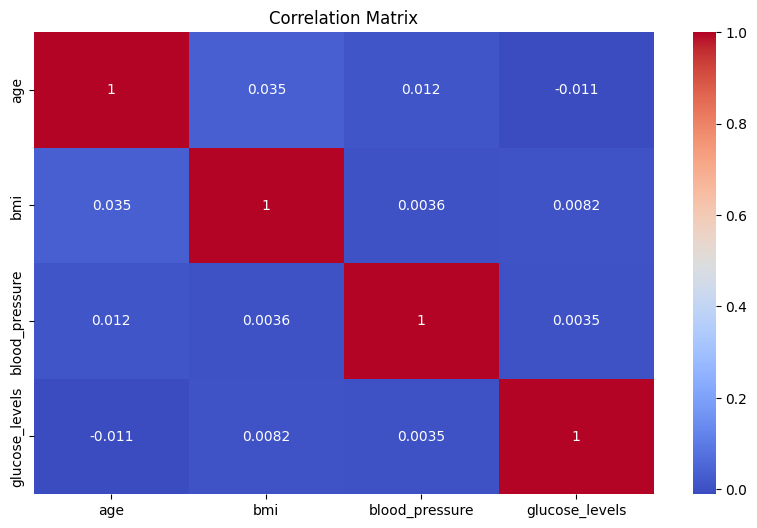

In [58]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
